In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")


In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
#View summary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# View statistical properties of dataset 
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
# View column names 
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
# duplicate columns
df.duplicated().sum()

0

In [9]:
# Number of unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
# drop policy_number','incident_location' column
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [11]:
# unique Values
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [12]:
df.replace('?',np.NaN,inplace=True)
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [13]:
# No. of Missing Values
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

In [14]:
# drop '_c39'column
df.drop(['_c39'],axis=1,inplace=True)

In [15]:
# Lets fill the null values for collision type.
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [16]:
#We will use mode method to fill this Nan values.

df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [17]:
#Lets fill the null values for property_damage.
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [18]:
#Again we will use the mode method to replace the Nan value.

df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [19]:
# #Lets fill the null values for police_report_available
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

In [20]:
##Again we will use the mode method to replace the Nan value.
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [21]:
# check missing vales again
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [22]:
# change to datetime
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Day'] = df['policy_bind_date'].dt.day

In [23]:
# drop policy_bind_date column
df.drop(['policy_bind_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [24]:
# statistical data horizontaly
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


<AxesSubplot:ylabel='fraud_reported'>

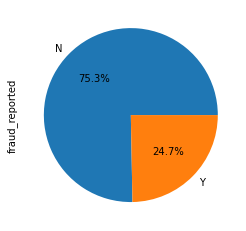

In [25]:
df['fraud_reported'].value_counts().plot.pie(figsize = (5,4), autopct = '%.1f%%')

<AxesSubplot:ylabel='police_report_available'>

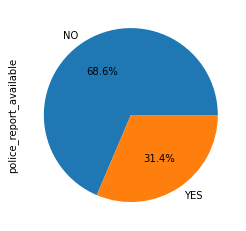

In [26]:
df['police_report_available'].value_counts().plot.pie(figsize = (5,4), autopct = '%.1f%%')

<AxesSubplot:ylabel='insured_sex'>

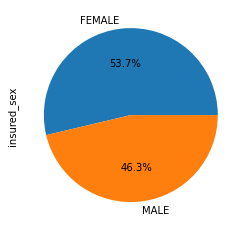

In [27]:
df['insured_sex'].value_counts().plot.pie(figsize = (5,4), autopct = '%.1f%%')

<AxesSubplot:ylabel='incident_type'>

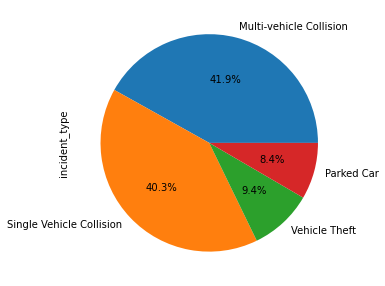

In [28]:
df['incident_type'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

<AxesSubplot:ylabel='authorities_contacted'>

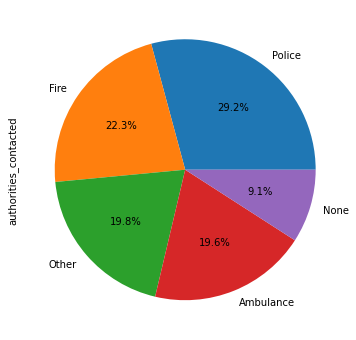

In [29]:
df['authorities_contacted'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

<AxesSubplot:ylabel='witnesses'>

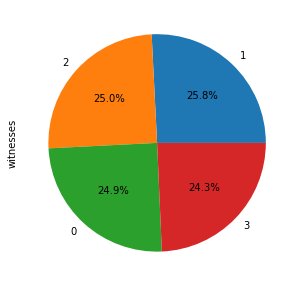

In [30]:
df['witnesses'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

<AxesSubplot:ylabel='incident_state'>

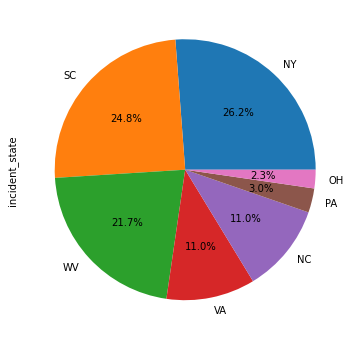

In [31]:
 df['incident_state'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

<AxesSubplot:ylabel='incident_city'>

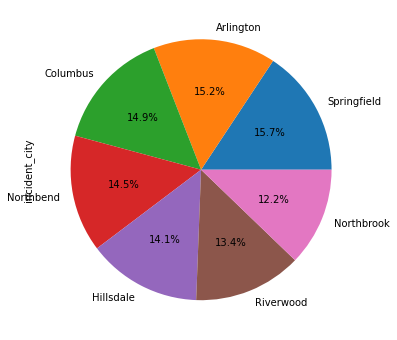

In [32]:
df['incident_city'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

<AxesSubplot:ylabel='Month'>

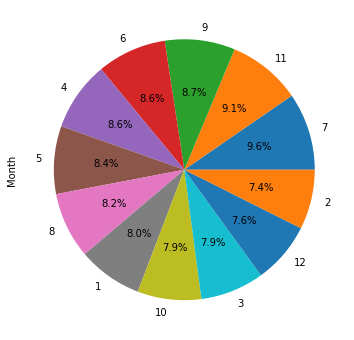

In [33]:
df['Month'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

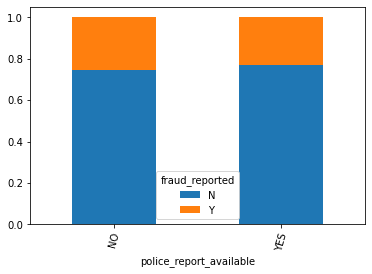

In [34]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

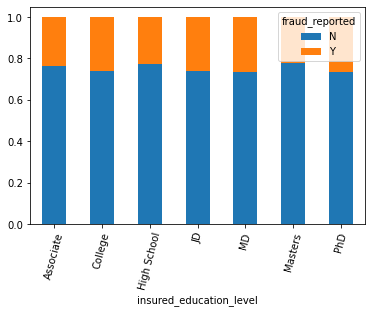

In [35]:
ct = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()


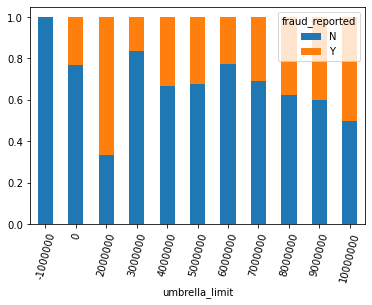

In [36]:
ct = pd.crosstab(df.umbrella_limit , df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

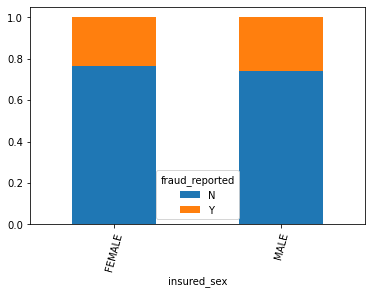

In [37]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()


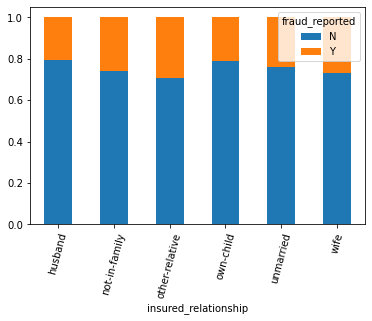

In [38]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

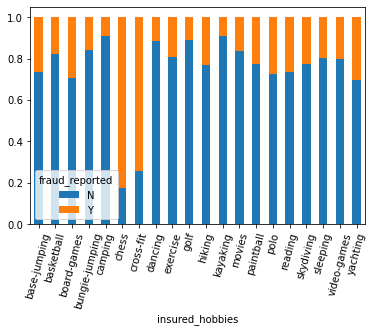

In [39]:
ct = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

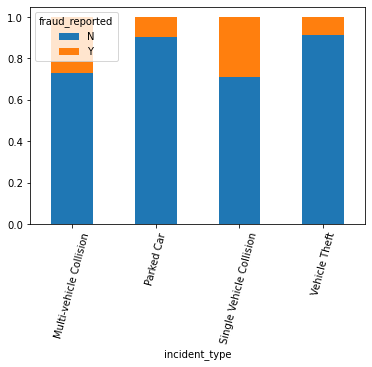

In [40]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

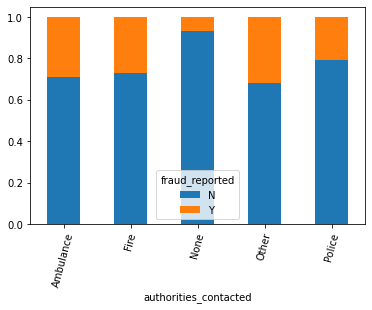

In [41]:
ct = pd.crosstab(df.authorities_contacted, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

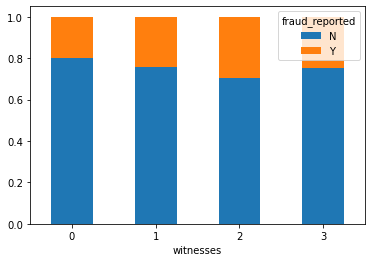

In [42]:
ct = pd.crosstab(df.witnesses, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

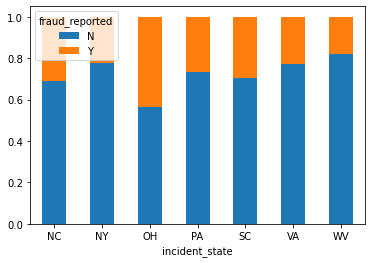

In [43]:
ct = pd.crosstab(df.incident_state, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

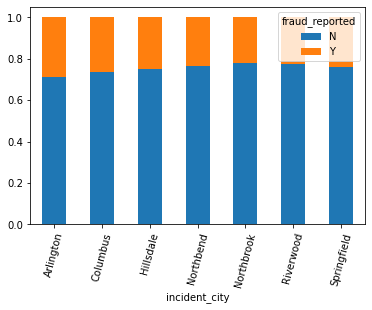

In [44]:
ct = pd.crosstab(df.incident_city, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

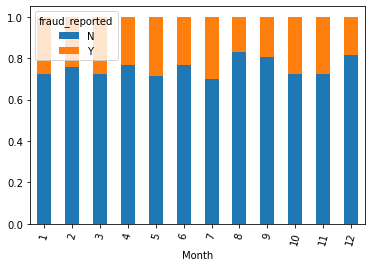

In [45]:
ct = pd.crosstab(df.Month, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

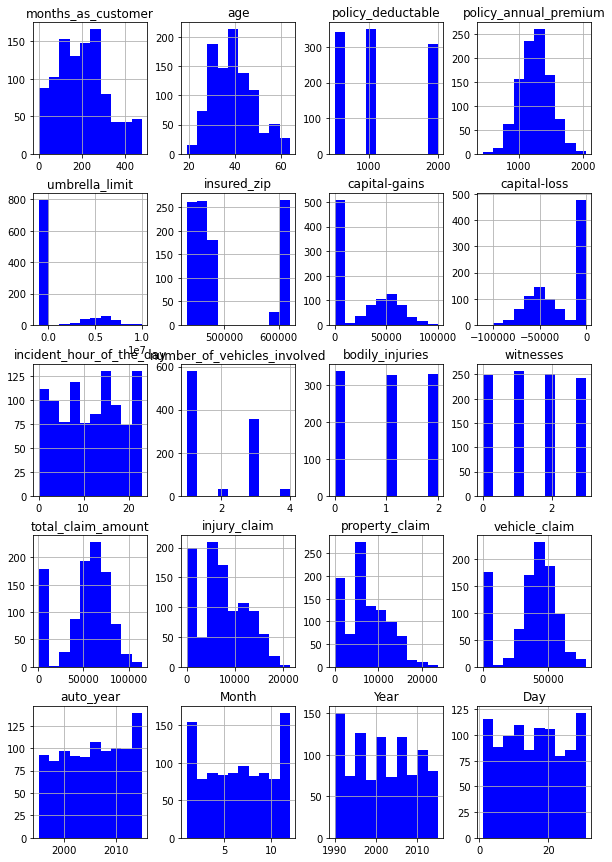

In [46]:
df.hist(figsize=(10,15),color = 'blue');

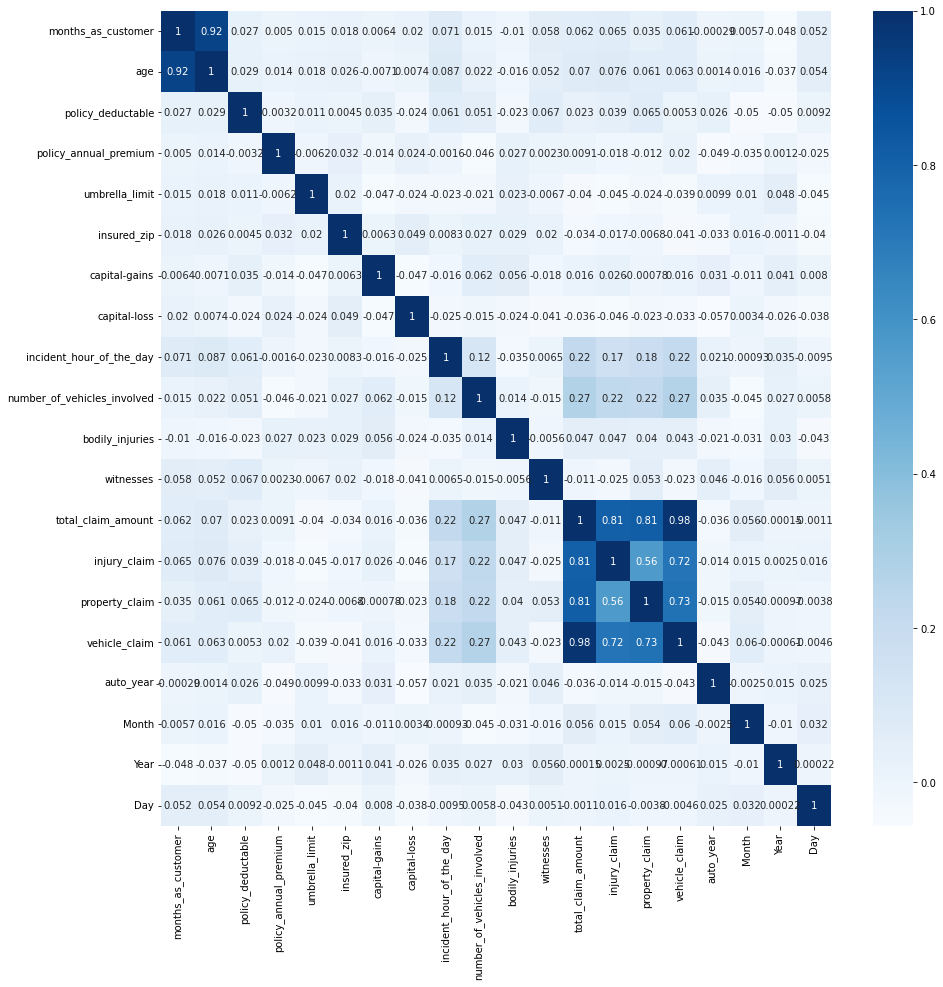

In [47]:
# Heatmap
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

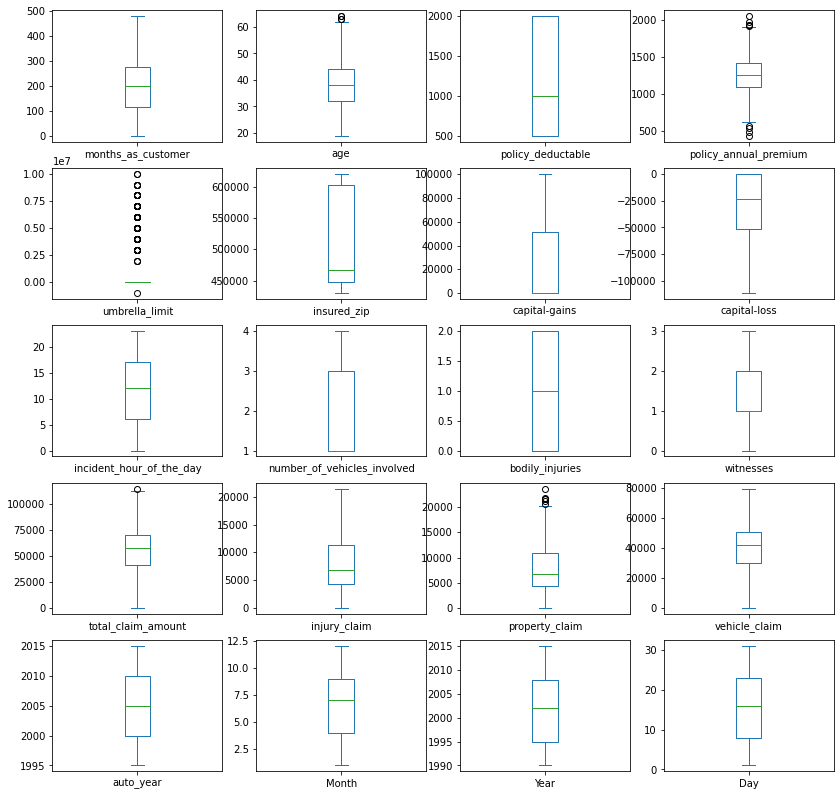

In [48]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

In [49]:
df[df["property_claim"]>20000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
163,112,30,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,27,IN,250/500,2000,1097.64,0,614812,MALE,High School,...,7080,21240,35400,Accura,TL,2006,N,5,1997,8
301,107,31,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,37,IN,250/500,1000,1306.78,0,466818,MALE,MD,...,13520,20280,47320,Toyota,Camry,1995,N,2,1992,10
500,1,29,OH,500/1000,500,854.58,0,612826,FEMALE,JD,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,...,7270,21810,50890,Honda,CRV,1996,Y,7,1997,11
687,194,41,IL,250/500,500,1203.81,0,613119,MALE,JD,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,41,IL,100/300,500,1042.25,0,601206,MALE,Masters,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


In [50]:
#replacing the property claim of 23670 with 21810 the second highest value.
df.loc[(df["vehicle_claim"] == 55230 )& (df['property_claim']==23670), 'property_claim']=21810

In [51]:
df[df["umbrella_limit"]>6000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
31,166,37,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,...,7460,7460,52220,Ford,F150,2006,Y,6,2008,19
48,175,34,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,...,810,810,5670,Volkswagen,Passat,1995,N,7,2008,1
50,430,59,OH,250/500,2000,1326.62,7000000,477310,MALE,MD,...,16360,8180,57260,Nissan,Pathfinder,1998,N,10,2004,1
66,107,31,IN,250/500,500,1239.22,7000000,476458,FEMALE,High School,...,13800,13800,62100,Audi,A5,2009,Y,8,2011,17
88,31,36,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,...,940,470,3290,Dodge,Neon,2002,N,8,1999,15
115,258,46,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,...,4770,9540,33390,Accura,MDX,1997,Y,9,1999,3
119,245,39,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,...,13240,6620,52960,BMW,3 Series,2010,N,4,2001,21
154,101,33,OH,100/300,1000,1053.04,7000000,619540,FEMALE,Masters,...,9040,9040,36160,Saab,93,2013,Y,6,2012,23
157,428,59,IN,250/500,500,1344.36,7000000,473329,FEMALE,JD,...,1300,650,4550,Saab,92x,2013,N,9,1999,29
161,278,48,IN,500/1000,2000,1142.62,7000000,475588,FEMALE,MD,...,11700,11700,52650,Chevrolet,Silverado,1997,N,7,1999,24


In [52]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

In [53]:
columns=['umbrella_limit','insured_zip']
for i in columns:
    df[i]=np.cbrt(df[i])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [55]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2,1,1000,1406.91,0.000000,77.535925,1,4,...,6510,13020,52080,10,1,2004,1,10,2014,17
1,228,42,1,1,2000,1197.22,170.997595,77.649092,1,4,...,780,780,3510,8,12,2007,1,6,2006,27
2,134,29,2,0,2000,1413.14,170.997595,75.515384,0,6,...,7700,3850,23100,4,30,2007,0,6,2000,9
3,256,41,0,1,2000,1415.74,181.712059,84.721905,0,6,...,6340,6340,50720,3,34,2014,1,5,1990,25
4,228,44,0,2,1000,1583.91,181.712059,84.841967,1,0,...,1300,650,4550,0,31,2009,0,6,2014,6


In [56]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

x.shape,y.shape

((1000, 38), (1000, 1))

In [57]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()

X,Y=SM.fit_resample(x,y)

y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<AxesSubplot:ylabel='fraud_reported'>

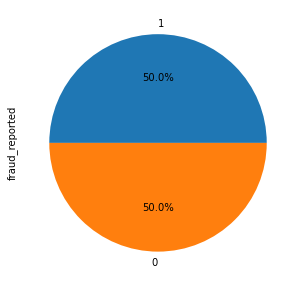

In [58]:
y_new['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.111646,1.035186,1.332195,0.247136,-0.246692,0.637815,-0.556265,-0.533513,1.272451,0.629035,...,0.665251,-0.248879,1.115009,0.702502,0.970369,-1.751124,-0.180146,1.162257,1.836332,0.147490
1,0.208527,0.357119,0.079050,0.247136,1.466218,-0.266957,1.955467,-0.501021,1.272451,0.629035,...,-2.035896,-1.483514,-1.518393,-2.057640,0.444411,-0.697052,0.347675,-0.092256,0.678728,1.347486
2,-0.640405,-1.112028,1.332195,-1.058782,1.466218,0.664697,1.955467,-1.113646,-0.785885,1.722947,...,-0.835115,0.007528,-0.857891,-0.944377,-0.607507,1.027794,0.347675,-0.092256,-0.189475,-0.812508
3,0.461400,0.244107,-1.174096,0.247136,1.466218,0.675915,2.112848,1.529708,-0.785885,1.722947,...,0.331972,-0.285509,-0.322174,0.625216,-0.870486,1.411093,1.579259,-0.405884,-1.636480,1.107487
4,0.208527,0.583141,-1.174096,1.553054,-0.246692,1.401537,2.112848,1.564180,1.272451,-1.558788,...,-1.977846,-1.371470,-1.546362,-1.998539,-1.659424,1.123618,0.699557,-0.092256,1.836332,-1.172506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.333345,-0.659983,-1.174096,-1.058782,0.960910,-0.474412,1.916308,-0.568585,-0.785885,-1.011832,...,1.660868,0.531117,2.261313,1.587714,0.444411,-0.888701,-0.180146,-0.405884,-0.768277,-1.052507
1502,0.949085,0.809163,-1.174096,-1.058782,-0.883895,-0.843632,-0.556265,1.448368,-0.785885,0.082080,...,1.041155,-0.199537,2.663423,0.806668,0.444411,-1.367825,-0.004206,-1.033140,-0.478876,-0.332509
1503,0.334964,0.131096,0.079050,0.247136,-0.791398,-0.328508,-0.556265,0.276838,-0.785885,0.082080,...,-0.211667,0.647254,-0.708148,-0.279943,-0.344527,-0.217928,-0.707968,-1.346769,0.823429,0.627488
1504,-1.570618,-1.790095,0.079050,-1.058782,-0.246692,-0.192554,-0.556265,0.965242,-0.785885,-1.011832,...,-0.363287,-1.362851,-0.261503,-0.079964,-1.659424,0.644495,1.051438,-1.346769,-0.478876,-0.452509


In [60]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(sc_x)

#Checking the cumulative sum of the expalined variance ratio.

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.1600724 ,  15.44614201,  20.01902062,  24.38100915,
        27.97128033,  31.35962667,  34.67389346,  37.82298643,
        40.9525009 ,  43.9752253 ,  46.94268827,  49.81995695,
        52.64128742,  55.40715747,  58.14015358,  60.83200494,
        63.4026859 ,  65.92203029,  68.3514313 ,  70.74728497,
        73.1266831 ,  75.47672369,  77.76858192,  80.02467811,
        82.18148745,  84.33423083,  86.41887471,  88.49868008,
        90.46048992,  92.37170541,  94.23844843,  96.03155413,
        97.66678324,  98.83842025,  99.43615047,  99.81228236,
        99.99999394, 100.        ])

In [61]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

finalx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.254564,1.115504,1.270442,2.835220,3.138305,0.809046,0.195849,0.356484,-0.905197,-0.344042,...,-0.565582,-0.277884,-0.229091,-0.408947,-0.448127,2.003703,-0.223350,1.058933,-0.293056,0.772675
1,-4.159912,0.736433,0.467170,-0.414818,0.295400,-0.036603,1.389845,-0.102914,0.597432,-1.042437,...,0.282363,-0.051943,0.234572,-0.066642,-0.232686,0.280893,1.240956,-0.145674,0.983175,0.999240
2,-0.958913,-1.106546,-1.503264,-0.149837,-2.361001,-0.381764,0.057819,1.075009,-1.020752,-0.869379,...,-0.236361,-0.855002,-1.072165,1.001966,-0.162565,-0.204821,-0.511860,-0.185299,1.486958,-1.132933
3,0.066437,1.369744,0.573466,-2.653802,-2.636555,0.615470,0.953518,0.776100,-2.493514,-1.229809,...,0.349622,-0.362031,-0.182722,-2.152816,-0.388258,0.177833,-1.031916,0.353196,-0.612492,-1.430687
4,-3.533205,1.486853,-0.515990,-1.588568,-1.855242,0.265620,-2.702881,2.535689,0.891942,-0.598654,...,0.765746,0.348433,1.654021,-1.734288,1.741003,0.489079,0.822543,0.657087,-1.852108,-0.219698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,2.697013,-0.382927,1.626755,-1.463073,-1.090888,-0.949749,-1.144643,-0.973109,0.297836,-1.018136,...,0.933275,-0.409348,-0.117713,1.010749,-1.362700,1.570285,-0.673738,1.162631,-0.821029,-0.687555
1502,2.729257,0.365343,-1.110487,-1.166271,0.411809,-0.962332,0.934551,0.081635,-0.537658,-0.936849,...,0.134082,-0.342157,-0.000914,1.153982,-1.597558,0.300046,-1.483750,0.367712,-0.523165,1.039556
1503,0.308323,-0.393890,-1.852691,-1.651336,2.146055,-0.436885,0.358120,0.674049,-0.042449,-0.119391,...,-0.403626,0.508148,-0.153804,0.249737,0.047736,-0.265334,0.243856,-0.137769,-0.000072,0.157916
1504,-0.526598,-2.947142,-1.351828,-1.794193,-1.127529,-0.408778,-0.735489,0.036707,-0.518490,1.086948,...,-0.011076,1.069623,0.494451,-0.248224,-1.027067,-0.654677,-1.049332,1.227890,-0.912324,0.140158


In [62]:
#reassign x to finalx
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.254564,1.115504,1.270442,2.835220,3.138305,0.809046,0.195849,0.356484,-0.905197,-0.344042,...,-0.565582,-0.277884,-0.229091,-0.408947,-0.448127,2.003703,-0.223350,1.058933,-0.293056,0.772675
1,-4.159912,0.736433,0.467170,-0.414818,0.295400,-0.036603,1.389845,-0.102914,0.597432,-1.042437,...,0.282363,-0.051943,0.234572,-0.066642,-0.232686,0.280893,1.240956,-0.145674,0.983175,0.999240
2,-0.958913,-1.106546,-1.503264,-0.149837,-2.361001,-0.381764,0.057819,1.075009,-1.020752,-0.869379,...,-0.236361,-0.855002,-1.072165,1.001966,-0.162565,-0.204821,-0.511860,-0.185299,1.486958,-1.132933
3,0.066437,1.369744,0.573466,-2.653802,-2.636555,0.615470,0.953518,0.776100,-2.493514,-1.229809,...,0.349622,-0.362031,-0.182722,-2.152816,-0.388258,0.177833,-1.031916,0.353196,-0.612492,-1.430687
4,-3.533205,1.486853,-0.515990,-1.588568,-1.855242,0.265620,-2.702881,2.535689,0.891942,-0.598654,...,0.765746,0.348433,1.654021,-1.734288,1.741003,0.489079,0.822543,0.657087,-1.852108,-0.219698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,2.697013,-0.382927,1.626755,-1.463073,-1.090888,-0.949749,-1.144643,-0.973109,0.297836,-1.018136,...,0.933275,-0.409348,-0.117713,1.010749,-1.362700,1.570285,-0.673738,1.162631,-0.821029,-0.687555
1502,2.729257,0.365343,-1.110487,-1.166271,0.411809,-0.962332,0.934551,0.081635,-0.537658,-0.936849,...,0.134082,-0.342157,-0.000914,1.153982,-1.597558,0.300046,-1.483750,0.367712,-0.523165,1.039556
1503,0.308323,-0.393890,-1.852691,-1.651336,2.146055,-0.436885,0.358120,0.674049,-0.042449,-0.119391,...,-0.403626,0.508148,-0.153804,0.249737,0.047736,-0.265334,0.243856,-0.137769,-0.000072,0.157916
1504,-0.526598,-2.947142,-1.351828,-1.794193,-1.127529,-0.408778,-0.735489,0.036707,-0.518490,1.086948,...,-0.011076,1.069623,0.494451,-0.248224,-1.027067,-0.654677,-1.049332,1.227890,-0.912324,0.140158


In [63]:
y=y_new
x.shape,y.shape

((1506, 32), (1506, 1))

In [64]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

In [65]:
#check the best possible random state to train our model
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8112582781456954  on Random state 130


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=130)

In [67]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.7984084880636605
[[161  46]
 [ 30 140]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       207
           1       0.75      0.82      0.79       170

    accuracy                           0.80       377
   macro avg       0.80      0.80      0.80       377
weighted avg       0.80      0.80      0.80       377

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8275862068965517
[[177  30]
 [ 35 135]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       207
           1       0.82      0.79      0.81       170

    accuracy                           0.83       377
   macro avg       0.83      0.82      0.83       377
weighted avg       0.83      0.83      0.83       377

-------------------------------------------------------------------------------------------

In [68]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

Mean Accuracy of LogisticRegression()
0.7477723262414468
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mean Accuracy of SVC(probability=True)
0.8195353237552527
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mean Accuracy of KNeighborsClassifier()
0.6739939715297794
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mean Accuracy of RandomForestClassifier()
0.8082242414908363
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mean Accuracy of DecisionTreeClassifier()
0.7105630239158656
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mean Accuracy of GaussianNB()
0.7935997007766606
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7796682141207014
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [69]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_AUC score of LogisticRegression()
0.8006535947712419


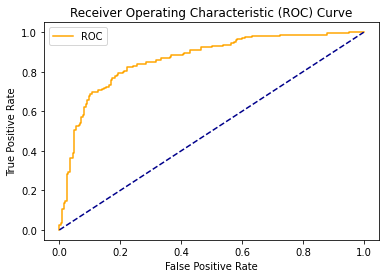

---------------xxxxxxxxxxxxx-----------
ROC_AUC score of SVC(probability=True)
0.8245950554134698


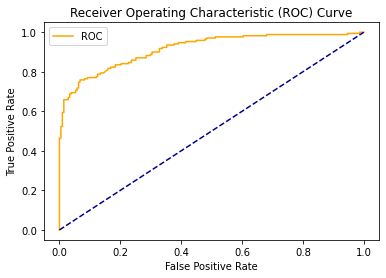

---------------xxxxxxxxxxxxx-----------
ROC_AUC score of KNeighborsClassifier()
0.6675049730036942


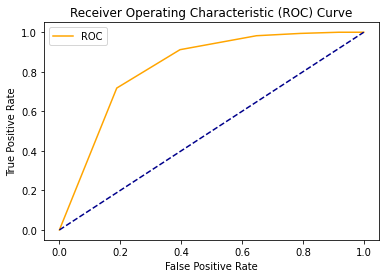

---------------xxxxxxxxxxxxx-----------
ROC_AUC score of RandomForestClassifier()
0.8475987496447855


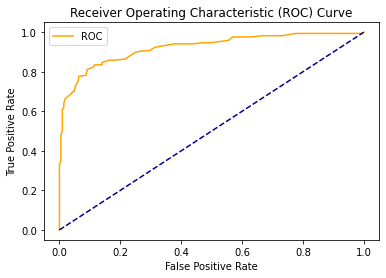

---------------xxxxxxxxxxxxx-----------
ROC_AUC score of DecisionTreeClassifier()
0.734697357203751


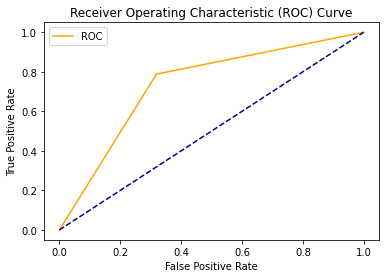

---------------xxxxxxxxxxxxx-----------
ROC_AUC score of GaussianNB()
0.8060102301790282


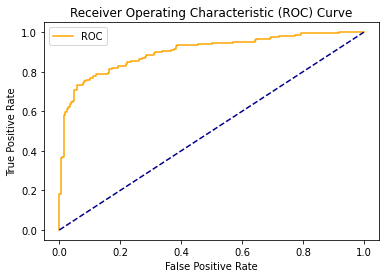

---------------xxxxxxxxxxxxx-----------
ROC_AUC score of AdaBoostClassifier(n_estimators=100)
0.7773373117362887


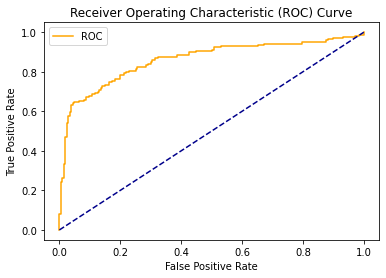

---------------xxxxxxxxxxxxx-----------


In [70]:
auc = []
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    score = roc_auc_score(y_test,pred)
    auc.append(score)
    print('ROC_AUC score of', m)
    print(score)
    probs = m.predict_proba(x_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    print('---------------xxxxxxxxxxxxx-----------')

In [71]:
 
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.798408,0.747772,0.800654
1,SVC,0.827586,0.819535,0.824595
2,KNeighborsClassifier,0.636605,0.673994,0.667505
3,RandomForestClassifier,0.830239,0.808224,0.847599
4,DecisionTreeClassifier,0.710875,0.710563,0.734697
5,GaussianNB,0.803714,0.793600,0.806010
6,AdaBoostClassifier,0.774536,0.779668,0.777337


In [72]:
from sklearn.model_selection import GridSearchCV
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50,100],
             'criterion':['gini', 'entropy']}

In [74]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

Random Forest classifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 82.75862068965517
Cross Validation Score 81.81888187278608
AUC ROC Score 82.72236430804206


AUC ROC Curve with Final Mod


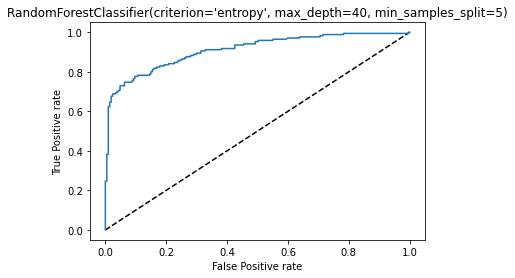

In [75]:
Finalmod=RandomForestClassifier(max_features= 'auto', min_samples_leaf= 1, min_samples_split=5,n_estimators=100,max_depth=40,criterion='entropy')
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

In [76]:
import joblib
joblib.dump(Finalmod,'fraud detection.obj')

['fraud detection.obj']